In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output

from sklearn.datasets import make_circles

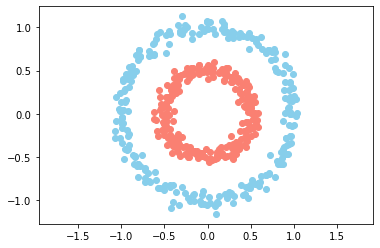

In [2]:
#Creamos un dataset con 500 datos y dos features.
n = 500
p = 2

X, Y = make_circles(n_samples = n, factor = 0.5, noise = 0.05)
Y = Y[: , np.newaxis]
plt.scatter(X[Y[:,0] == 0,0],X[Y[:,0] ==0,1] , c = 'skyblue')
plt.scatter(X[Y[:,0] == 1,0],X[Y[:,0] == 1,1] , c = 'salmon')
plt.axis('equal')
plt.show()

In [3]:
#Clase que representara una capa de una red neuronal.
class neural_layer():
    
    def __init__(self, nro_conexiones , cant_n ,act_f):
        self.act_f = act_f
        self.b = np.random.rand(1, cant_n)             * 2 - 1
        self.W = np.random.rand(nro_conexiones,cant_n) * 2 - 1

In [4]:
#Funciones de activacion y su derivada
sigm = (lambda x: 1 / (1 + np.e ** (-x)),
        lambda x: x * (1 - x))

relu = (lambda x :np.maximun(0,x),
       )

In [5]:
#Definimos la arquitectura de la red
def crear_red(arquitectura,act_f):
    nn = []
    for l, layer in enumerate(arquitectura[:-1]):
            nn.append(neural_layer(layer, arquitectura[l+1], act_f))    
    return nn

In [6]:
#Definimos como funcion de coste el error cuadratico medio
funcion_coste = (lambda Yp,Yr : np.mean((Yp-Yr)**2),
                lambda Yp,Yr : (Yp - Yr))

Es importante tener en cuenta que 
w(n + 1) = w + n* gradiente(Costo)

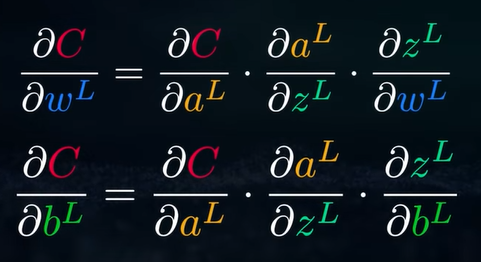
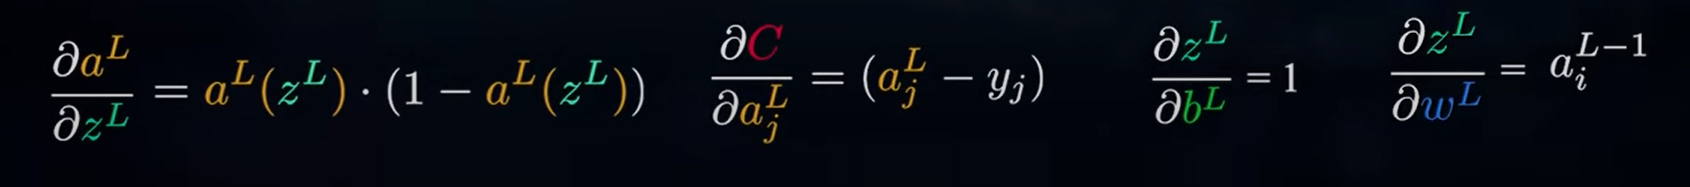

Se llama delta a la siguiente generalizacion que sirve para el resto de los calculos 

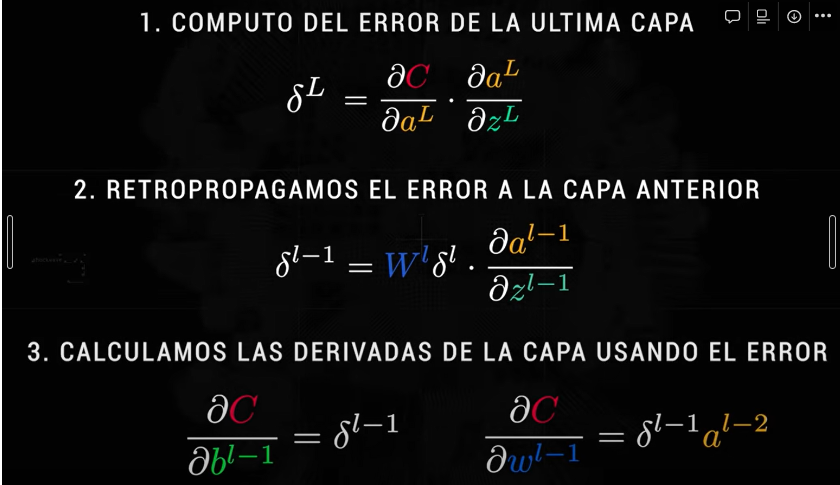

In [7]:
def train( neural_net , X , Y , funcion_coste , lr = 0.5, train = True):
    #Forward Pass
    output = [ (None,X)]
    for l,layer in enumerate(neural_net):
        z = np.dot(output[-1][1],neural_net[l].W)   + neural_net[l].b
        a = neural_net[l].act_f[0](z)
        output.append((z,a))

    if train:
        #Backpropagation.
        deltas = []
        for l in reversed(range(0, len(neural_net))):
            z = output[l+1][0]
            a = output[l+1][1]
            if l == len(neural_net)-1:
                #Formula 1) delta
                # Derivada de la funcion de coste * derivada de la funcion de activacion.
                deltas.insert(0, funcion_coste[1](a,Y) * neural_net[l].act_f[1](a))
            else:
                deltas.insert(0, deltas[0] @ _W.T * neural_net[l].act_f[1](a))
            _W = neural_net[l].W    

            #Descenso del gradiente.
            neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis = 0, keepdims = True) * lr
            neural_net[l].W = neural_net[l].W - output[l][1].T @ deltas[0] * lr
    return output[-1][1]

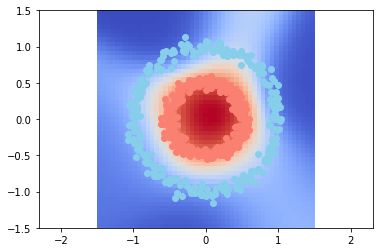

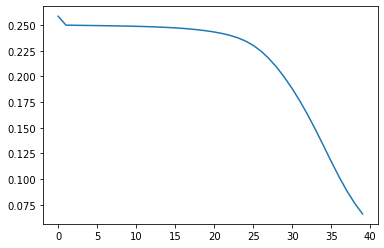

[[0.75677444]
 [0.30593644]
 [0.75281578]
 [0.74974444]
 [0.73794181]
 [0.79248348]
 [0.25237091]
 [0.30567122]
 [0.71645777]
 [0.78134905]
 [0.71070066]
 [0.25603534]
 [0.27190797]
 [0.76138549]
 [0.80559735]
 [0.73585467]
 [0.23497784]
 [0.80353781]
 [0.31729159]
 [0.80992737]
 [0.69211978]
 [0.26118591]
 [0.30018701]
 [0.22714924]
 [0.25763804]
 [0.11010791]
 [0.25585175]
 [0.75291618]
 [0.30611623]
 [0.77766815]
 [0.25781463]
 [0.1309891 ]
 [0.3524197 ]
 [0.74960675]
 [0.12963433]
 [0.6846707 ]
 [0.10952043]
 [0.78073348]
 [0.30703847]
 [0.75251397]
 [0.77245262]
 [0.86383808]
 [0.85108008]
 [0.30353629]
 [0.76396371]
 [0.77034325]
 [0.76481268]
 [0.17562571]
 [0.33186632]
 [0.12287054]
 [0.80664442]
 [0.37933428]
 [0.71592563]
 [0.78459147]
 [0.17981584]
 [0.72140173]
 [0.75733655]
 [0.14703825]
 [0.25518639]
 [0.76354501]
 [0.3703448 ]
 [0.6947573 ]
 [0.7392625 ]
 [0.23739212]
 [0.79493887]
 [0.72120756]
 [0.41824053]
 [0.72708154]
 [0.25696158]
 [0.16862615]
 [0.79632623]
 [0.32

[[0.92187281]
 [0.49660484]
 [0.8911937 ]
 [0.9317517 ]
 [0.90762797]
 [0.88915188]
 [0.63705377]
 [0.70182037]
 [0.80243758]
 [0.91516023]
 [0.89421573]
 [0.62763957]
 [0.35377886]
 [0.88994497]
 [0.94669263]
 [0.89408692]
 [0.59407384]
 [0.93807155]
 [0.48219126]
 [0.88998137]
 [0.91393438]
 [0.45065662]
 [0.45548711]
 [0.50953382]
 [0.57969046]
 [0.1430804 ]
 [0.64176637]
 [0.89396276]
 [0.51421818]
 [0.86270831]
 [0.2987489 ]
 [0.19079677]
 [0.70350048]
 [0.83634222]
 [0.16922502]
 [0.90379765]
 [0.17470813]
 [0.94026162]
 [0.68796562]
 [0.87141385]
 [0.90593543]
 [0.93446499]
 [0.91894616]
 [0.47710548]
 [0.90676889]
 [0.8882898 ]
 [0.93270044]
 [0.40812853]
 [0.68044474]
 [0.20639758]
 [0.89227009]
 [0.44336727]
 [0.86188947]
 [0.90748244]
 [0.25243144]
 [0.91638899]
 [0.93235579]
 [0.20341667]
 [0.63703589]
 [0.87685368]
 [0.4189957 ]
 [0.80019787]
 [0.92700054]
 [0.62214631]
 [0.87542103]
 [0.81505519]
 [0.47899639]
 [0.81075803]
 [0.63698369]
 [0.21961055]
 [0.89623954]
 [0.65

In [8]:
arquitectura = [p,4,8,1]
nn = crear_red(arquitectura,sigm)
loss = []

for i in range(1000):

    #Entrenamos la red
    
    pY = train( nn , X, Y, funcion_coste , lr = 0.01)
    print(pY)
    
    if i % 25 == 0:
        loss.append(funcion_coste[0](pY,Y))
        res = 50
        
        _x0 = np.linspace(-1.5 , 1.5,res)
        _x1 = np.linspace(-1.5 , 1.5,res) 
        _Y = np.zeros((res,res))
        
        for i0,x0 in enumerate(_x0):
            for i1,x1 in enumerate(_x1):
                _Y[i0,i1] = train(nn , np.array([[x0,x1]]), Y,funcion_coste, train = False)[0][0]
                
        plt.pcolormesh( _x0 , _x1, _Y , cmap = 'coolwarm')
        plt.axis('equal')
        plt.scatter(X[Y[:,0] == 0,0],X[Y[:,0] == 0,1] , c = 'skyblue')
        plt.scatter(X[Y[:,0] == 1,0],X[Y[:,0] == 1,1] , c = 'salmon')
        
        clear_output(wait = True)
        plt.show()
        plt.plot( range(len(loss)),loss)
        plt.show()
        time.sleep(0.5)